## EA Sports Teams  Analysis

**Introduction**

In this analysis, we leveraged the EA Sports dataset spanning from 2014 to 2024 for FIFA games. Our goal was to harness data science and analytics to uncover valuable insights from this rich dataset. We explored various aspects of the data to better understand team performance, attribute relationships, and trends over the years.

**Key Objectives**

Identifying Best-Performing Teams: We sought to determine which teams consistently exhibited the highest average overall rating, effectively identifying the best-performing teams over time.

- Analyzing Attribute Relationships: We explored how different team attributes relate to each other, unveiling hidden connections and dependencies among the attributes.

- Distribution Analysis: Examining attribute distributions allowed us to gain insights into the data's inherent patterns, highlighting central tendencies and variabilities.

- Yearly Team Performance Trends: To assess the progress of teams over time, we analyzed the trend of overall scores on a yearly basis, providing a comprehensive view of performance changes.

- Top Teams in Key Attributes: We conducted an analysis to identify the top teams in critical attributes, shedding light on which teams excelled in specific aspects.

- League Analysis: We explored the top leagues, assessing their overall scores and identifying those with the youngest and oldest squads.

- Attributes vs. Overall Score: An essential part of our analysis was investigating how team attributes correlate with the overall team score, providing valuable insights into what makes a team successful.

**Limitations**

It is important to acknowledge certain limitations of this analysis and the dataset:

- Missing Data: A significant number of missing values in various columns restricted our ability to perform extensive statistical modeling and testing. This posed a challenge in obtaining a holistic view of the dataset, as null values hindered precise analysis.

Despite these limitations, our analysis still offers valuable insights into the FIFA games dataset, shedding light on team performance and the relationships between attributes. We hope this analysis serves as a valuable resource for enthusiasts, researchers, and data science enthusiasts interested in the world of FIFA games


In [1]:
#importing packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import plotly.express as px

#for statistical analysis 
import scipy
from scipy.stats import chisquare
from bioinfokit.analys import stat
%matplotlib inline 

pd.set_option('display.max_colwidth', None) #to display all columns in the dataframe
pd.set_option('display.max_columns', None )

import warnings
warnings.filterwarnings('ignore')


<a id='wrangling'></a>
## Data Wrangling

In [2]:
#top five rows

teams_data=pd.read_csv('teams_data.csv')
teams_data.tail()

,team_id,team_url,fifa_version,fifa_update,update_as_of,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,rival_team,international_prestige,domestic_prestige,transfer_budget_eur,club_worth_eur,starting_xi_average_age,whole_team_average_age,captain,short_free_kick,long_free_kick,left_short_free_kick,right_short_free_kick,penalties,left_corner,right_corner,def_style,def_team_width,def_team_depth,def_defence_pressure,def_defence_aggression,def_defence_width,def_defence_defender_line,off_style,off_build_up_play,off_chance_creation,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
13892,1572,/team/1572/drogheda-united/150002,15,2,9/18/2014,Drogheda United,65,Premier Division,1,25,Republic of Ireland,54,55,53,53,37618984,Town Park,837,1,10,150000,NaN,26.27,24.48,201475,204766,208582,204766,204766,149827,204766,208582,NaN,NaN,NaN,38,49,46,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,47,49,Organised,51,46,44,Organised
13893,838,/team/838/bray-wanderers/150002,15,2,9/18/2014,Bray Wanderers,65,Premier Division,1,25,Republic of Ireland,53,53,53,52,978851,Town Park,111132,1,10,100000,NaN,23.55,22.64,190033,163365,163365,163365,163365,163365,198469,198469,NaN,NaN,NaN,38,40,52,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,44,52,Organised,38,40,38,Organised
13894,111132,/team/111132/ucd-afc/150002,15,2,9/18/2014,UCD,65,Premier Division,1,25,Republic of Ireland,53,52,54,53,120550,Town Park,306,1,9,100000,NaN,22.45,21.56,200134,200134,200134,200134,200134,200134,201421,201421,NaN,NaN,NaN,48,42,47,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,46,35,Organised,38,56,55,Organised
13895,111965,/team/111965/athlone-town/150002,15,2,9/18/2014,Athlone Town,65,Premier Division,1,25,Republic of Ireland,52,52,53,52,37629650,Town Park,111285,1,9,100000,NaN,26,24.52,201465,216555,216555,216555,216555,157331,201474,201474,NaN,NaN,NaN,38,40,47,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,47,36,Organised,53,43,48,Organised
13896,>>>>>>> 7693083983d44a0160997b731185dbc6e6e38269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#taking out international friendlies 
teams_data = teams_data[teams_data['league_name']!='Friendly International']
##selecting top tier leagues only
teams_data = teams_data[teams_data['league_level']=='1']

In [4]:
#number of rows and columns in rhe dataset
teams_data.columns

Index(['team_id', 'team_url', 'fifa_version', 'fifa_update', 'update_as_of',
       'team_name', 'league_id', 'league_name', 'league_level',
       'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield',
       'defence', 'coach_id', 'home_stadium', 'rival_team',
       'international_prestige', 'domestic_prestige', 'transfer_budget_eur',
       'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age',
       'captain', 'short_free_kick', 'long_free_kick', 'left_short_free_kick',
       'right_short_free_kick', 'penalties', 'left_corner', 'right_corner',
       'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure',
       'def_defence_aggression', 'def_defence_width',
       'def_defence_defender_line', 'off_style', 'off_build_up_play',
       'off_chance_creation', 'off_team_width', 'off_players_in_box',
       'off_corners', 'off_free_kicks', 'build_up_play_speed',
       'build_up_play_dribbling', 'build_up_play_passing',
       'build_u

In [5]:
teams_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9702 entries, 0 to 13895
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   team_id                      9702 non-null   object
 1   team_url                     9702 non-null   object
 2   fifa_version                 9702 non-null   object
 3   fifa_update                  9702 non-null   object
 4   update_as_of                 9702 non-null   object
 5   team_name                    9702 non-null   object
 6   league_id                    9702 non-null   object
 7   league_name                  9702 non-null   object
 8   league_level                 9702 non-null   object
 9   nationality_id               9702 non-null   object
 10  nationality_name             9702 non-null   object
 11  overall                      9702 non-null   object
 12  attack                       9702 non-null   object
 13  midfield                     9702 non

In [6]:
# List of columns to convert to numeric
columns_to_convert = [
    'overall', 'attack', 'midfield', 'defence',
    'international_prestige', 'domestic_prestige', 'transfer_budget_eur',
    'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age',
    'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure',
    'def_defence_aggression', 'def_defence_width', 
     'off_team_width', 'off_players_in_box', 'build_up_play_speed',
    'build_up_play_dribbling', 'build_up_play_passing', 'chance_creation_passing',
    'chance_creation_crossing', 'chance_creation_shooting'
]

# Loop through the columns and convert them to numeric
for column in columns_to_convert:
    teams_data[column] = pd.to_numeric(teams_data[column], errors='coerce')


In [7]:
# Calculate the number and percentage of missing values for all columns
missing_values_count = teams_data.isnull().sum()
missing_values_pct = round((missing_values_count / len(teams_data)) * 100, 2)

# Create a new DataFrame with the results
result_df = pd.DataFrame({
    'Num Missing Values': missing_values_count,
    'Pct Missing Values': missing_values_pct
})

# Display the results
display(result_df)


,Num Missing Values,Pct Missing Values
team_id,0,0.00
team_url,0,0.00
fifa_version,0,0.00
fifa_update,0,0.00
update_as_of,0,0.00
team_name,0,0.00
league_id,0,0.00
league_name,0,0.00
league_level,0,0.00
nationality_id,0,0.00


In [8]:
#descriptive statistics of players attributes 
teams_data.describe()

,overall,attack,midfield,defence,international_prestige,domestic_prestige,transfer_budget_eur,club_worth_eur,starting_xi_average_age,whole_team_average_age,def_style,def_team_width,def_team_depth,def_defence_pressure,def_defence_aggression,def_defence_width,off_team_width,off_players_in_box,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,chance_creation_passing,chance_creation_crossing,chance_creation_shooting
count,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,7.694000e+03,7.956000e+03,9702.000000,9702.000000,0.0,6064.000000,6064.000000,4598.000000,4598.000000,4598.000000,6064.000000,6064.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.00000
mean,69.237271,69.815296,69.142445,68.479076,3.973614,6.845599,9.768626e+06,1.441487e+08,26.854218,25.280884,NaN,29.345317,29.748351,48.833841,49.828621,49.949108,32.883245,4.360488,52.579382,49.593736,50.292736,51.369291,53.666377,53.08134
std,5.390702,5.871041,5.534694,5.479439,3.387816,4.269920,1.938229e+07,4.515541e+08,1.742766,1.496968,NaN,24.391979,24.875166,11.962754,11.330203,10.035375,27.389426,1.409539,10.713552,11.136712,10.809522,12.282220,12.371227,11.94487
min,52.000000,48.000000,53.000000,52.000000,1.000000,1.000000,1.000000e+05,9.150000e+05,20.180000,20.120000,NaN,3.000000,3.000000,23.000000,20.000000,20.000000,3.000000,3.000000,28.000000,20.000000,20.000000,25.000000,20.000000,22.00000
25%,65.000000,66.000000,65.000000,65.000000,1.000000,4.000000,1.600000e+06,6.700000e+06,25.640000,24.252500,NaN,5.000000,5.000000,43.000000,43.000000,43.000000,6.000000,3.000000,45.250000,42.000000,40.000000,40.000000,45.000000,45.00000
50%,69.000000,69.000000,69.000000,68.000000,3.000000,6.000000,3.500000e+06,1.800000e+07,26.910000,25.210000,NaN,40.000000,38.500000,47.000000,49.000000,50.000000,40.000000,4.000000,52.000000,50.000000,50.000000,51.000000,53.000000,53.00000
75%,73.000000,74.000000,73.000000,72.000000,6.000000,9.000000,8.700000e+06,9.000000e+07,28.000000,26.190000,NaN,51.000000,51.000000,57.000000,57.000000,57.000000,61.000000,5.000000,61.000000,55.000000,55.750000,61.000000,63.000000,63.00000
max,86.000000,92.000000,89.000000,87.000000,20.000000,20.000000,1.909000e+08,4.800000e+09,32.550000,32.600000,NaN,81.000000,81.000000,76.000000,80.000000,72.000000,81.000000,8.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000


In [9]:
numerical_data = teams_data.select_dtypes(include=['number'])


In [10]:
teams_data['update_as_of'] = pd.to_datetime(teams_data['update_as_of'], format='%m/%d/%Y', errors='coerce')

# Extract the year from the 'date' column and create a new column 'year'
teams_data['year'] = teams_data['update_as_of'].dt.year

In [11]:
# Convert the 'overall' column to numeric
teams_data['overall'] = pd.to_numeric(teams_data['overall'], errors='coerce')

# 'coerce' argument will replace parsing errors with NaN (Not-a-Number)

# Now, you can calculate the average ratings by year
average_ratings_by_year = teams_data.groupby('year')['overall'].mean()


**Yearly Team Performance Trends**

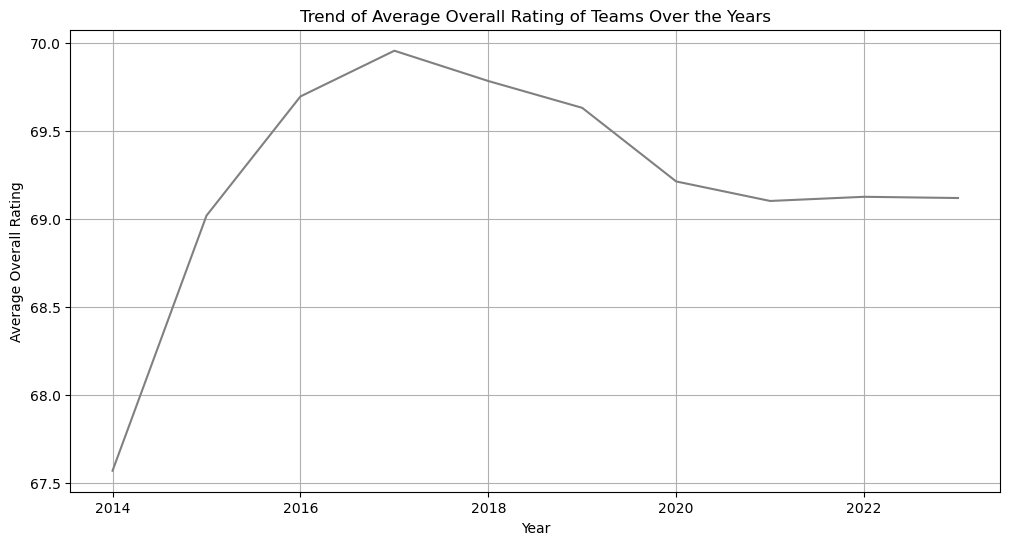

In [12]:
# Create a line plot to show the trend
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, linestyle='-', color='grey')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.title('Trend of Average Overall Rating of Teams Over the Years')
plt.grid(True)

plt.show()


- The overall ratings for the FIFA teams have shown a relatively stable trend over the years 2014 to 2023. The ratings have fluctuated within a relatively narrow range, with values ranging from approximately 67.57 to 69.96.

- While the overall ratings have remained stable, there are slight fluctuations from year to year. The ratings peaked at around 69.96 in 2017 and dipped to approximately 67.57 in 2014. Despite these fluctuations, the overall trend remained steady.

- In recent years (from 2018 to 2023), the overall ratings have maintained a consistent level, hovering around 69.12 to 69.63. This suggests that team performance, as measured by overall ratings, has been relatively stable during this period.

- The overall ratings of FIFA teams seem to have converged to a relatively consistent level since 2017, indicating that the overall performance of teams has stabilized.

These insights suggest that there has been a degree of stability in the performance of FIFA teams, particularly in the recent years covered by the data, with only minor year-to-year fluctuations. 

 

**Distribution Analysis**

In [32]:
caterical_data = teams_data.select_dtypes(include=['object'])
caterical_data.columns

Index(['team_id', 'team_url', 'fifa_version', 'fifa_update', 'team_name',
       'league_id', 'league_name', 'league_level', 'nationality_id',
       'nationality_name', 'coach_id', 'home_stadium', 'rival_team', 'captain',
       'short_free_kick', 'long_free_kick', 'left_short_free_kick',
       'right_short_free_kick', 'penalties', 'left_corner', 'right_corner',
       'def_defence_defender_line', 'off_style', 'off_build_up_play',
       'off_chance_creation', 'off_corners', 'off_free_kicks',
       'build_up_play_positioning', 'chance_creation_positioning'],
      dtype='object')

In [30]:
teams_data['chance_creation_positioning'].value_counts(normalize = True)*100

chance_creation_positioning
Organised    82.905611
Free Form    17.094389
Name: proportion, dtype: float64

In [26]:
category_counts = teams_data['chance_creation_positioning'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(
    values=category_counts,
    names=category_counts.index,
    title='Team Attributes Categories Distribution'
)

fig.show()


Teams that adopt an "Organized" approach to chance creation positioning represent the majority in this dataset, making up approximately 82.91% of the total. This suggests that a significant number of teams in the dataset tend to have a structured and well-organized approach to creating goal-scoring opportunities. Such teams may follow specific tactics and strategies to generate scoring chances, possibly through structured passing, movement, and positioning on the field.

On the other hand, teams that opt for a "Free Form" style of chance creation positioning are in the minority, constituting roughly 17.09% of the dataset. This indicates that a smaller proportion of teams prefer a more improvisational or less structured approach to creating goal-scoring opportunities. These teams might rely more on individual creativity and player freedom to generate chances.


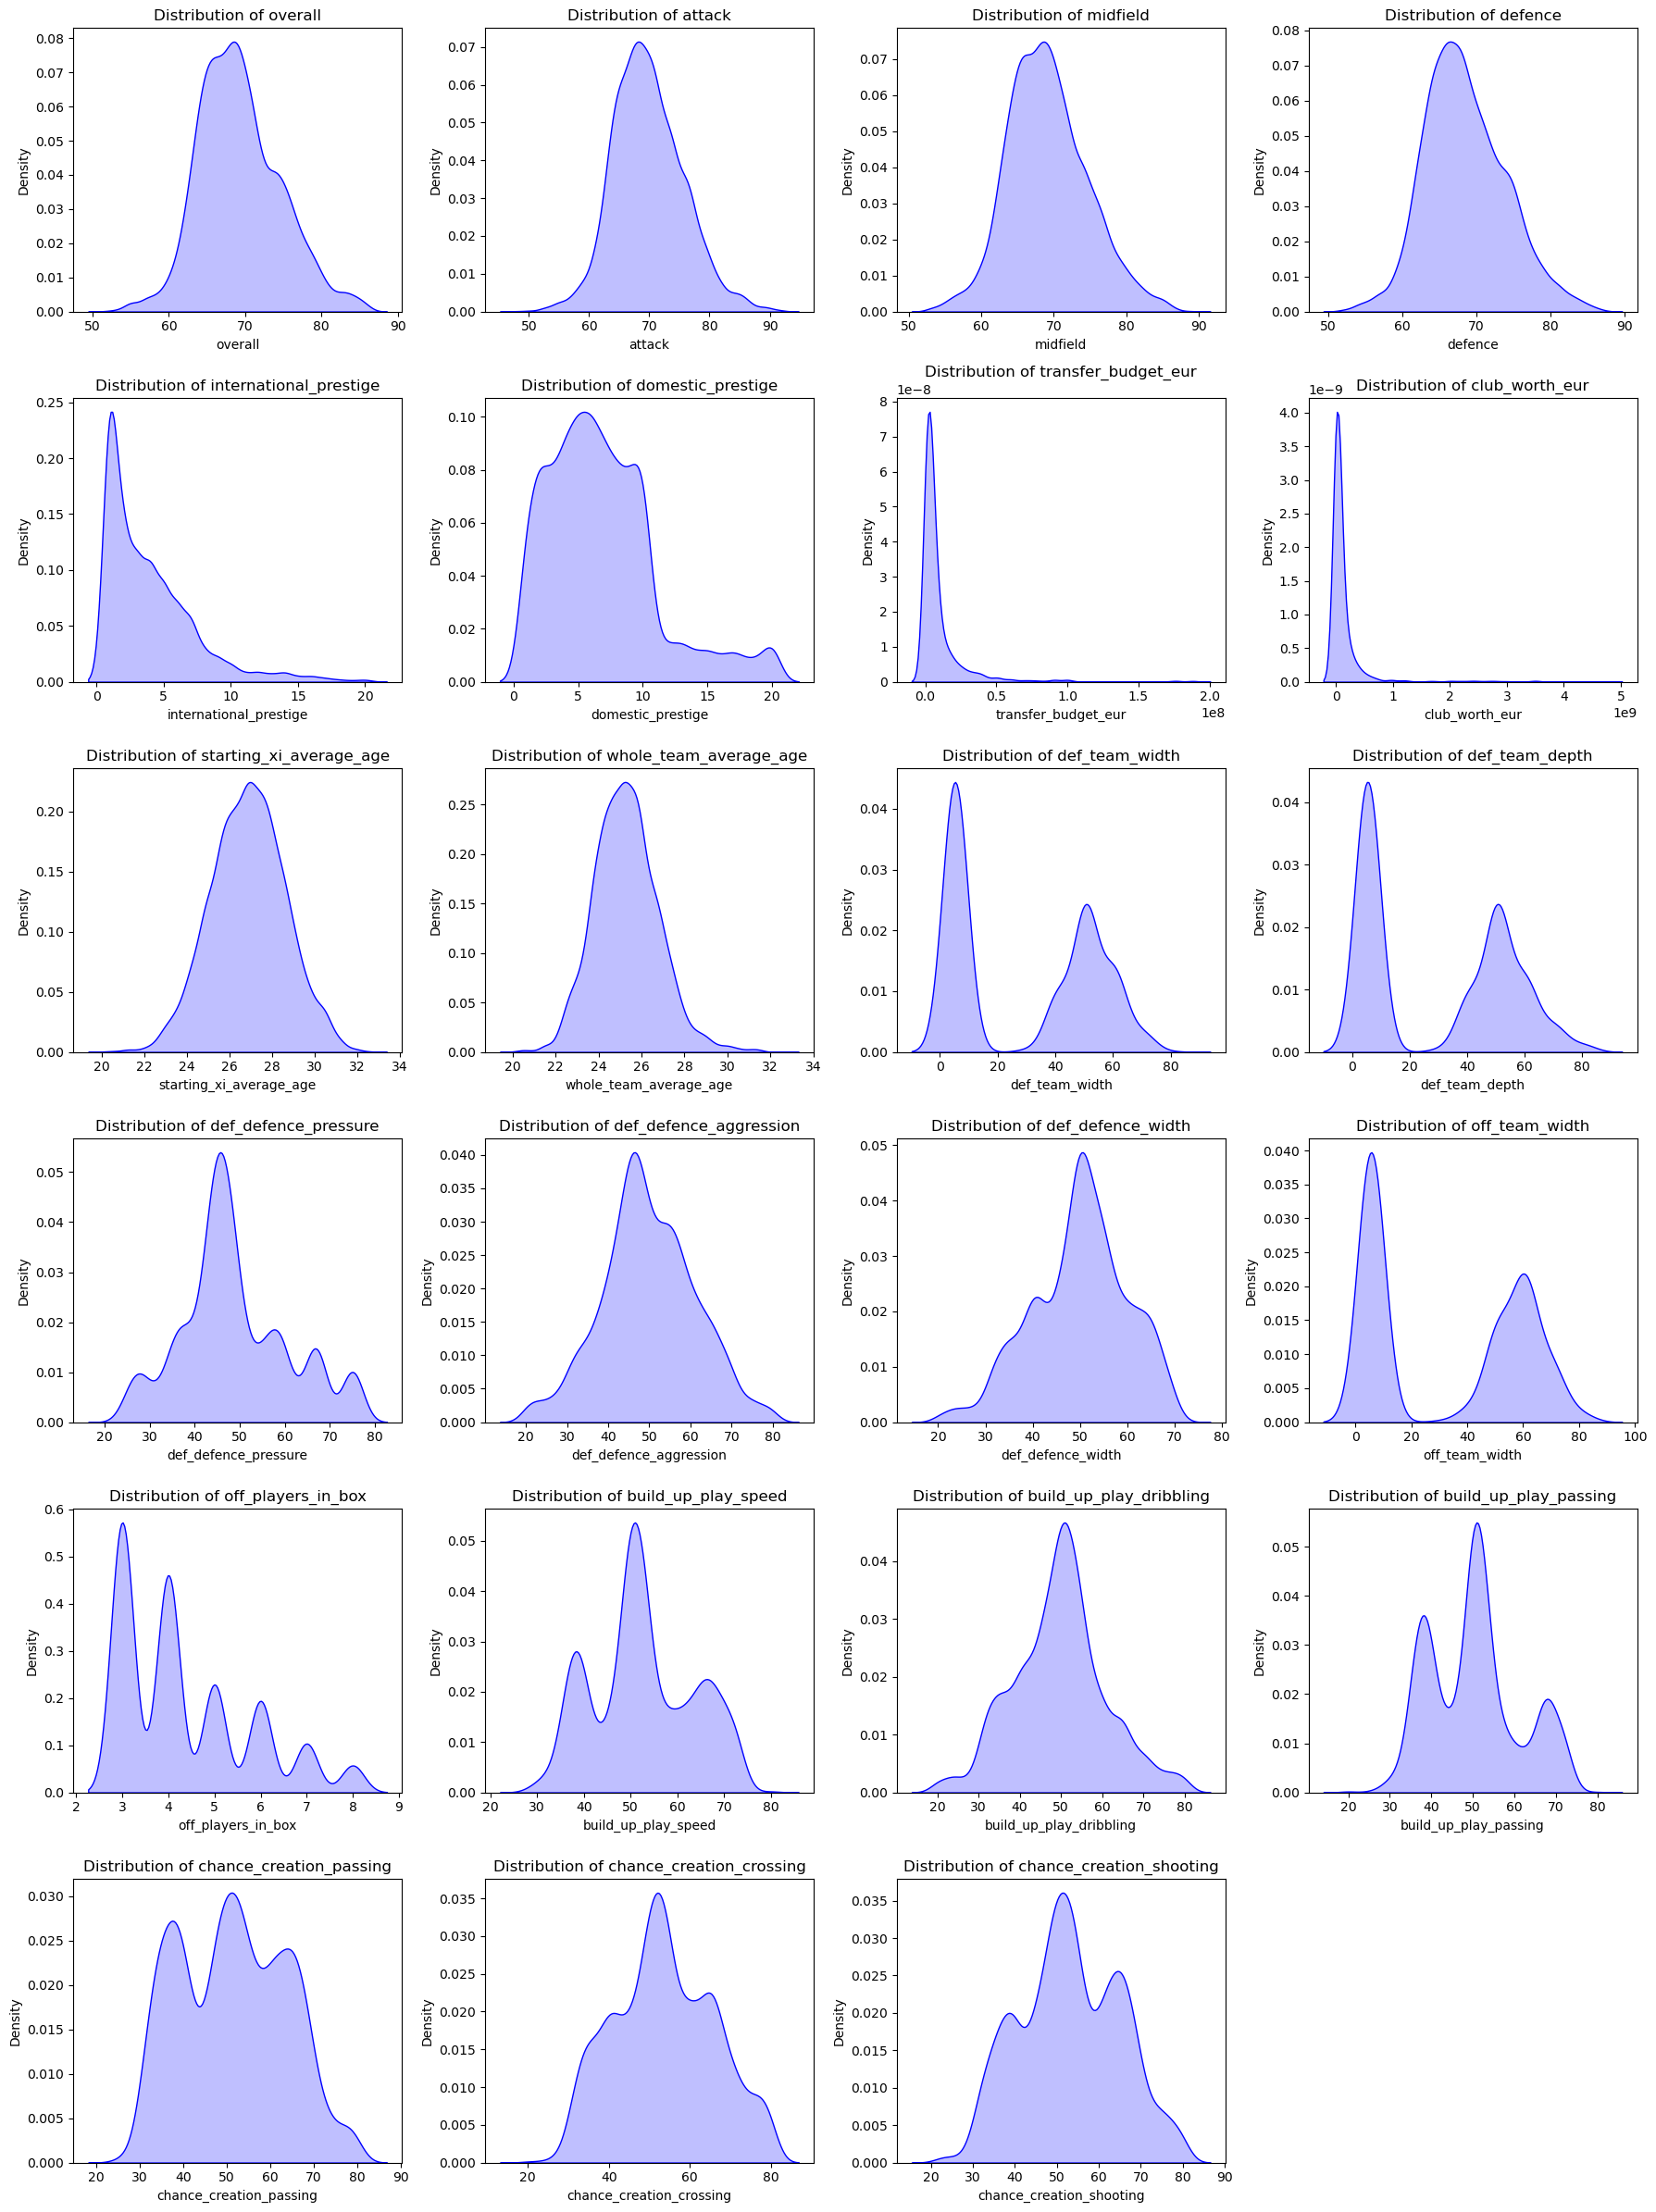

In [15]:
# Select the variables we want to plot
teams_variables_to_plot = ['overall', 'attack', 'midfield', 'defence', 'international_prestige',
       'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur',
       'starting_xi_average_age', 'whole_team_average_age', 
       'def_team_width', 'def_team_depth', 'def_defence_pressure',
       'def_defence_aggression', 'def_defence_width', 'off_team_width','off_players_in_box', 
       'build_up_play_speed', 'build_up_play_dribbling',
       'build_up_play_passing', 'chance_creation_passing',
       'chance_creation_crossing', 'chance_creation_shooting']

# Calculate the number of rows and columns needed for subplots
n_variables = len(teams_variables_to_plot)
n_rows = (n_variables - 1) // 4 + 1
n_columns = min(n_variables, 4)

# Create subplots for the variables
plt.figure(figsize=(18, 4 * n_rows))

# Loop through the selected variables and create density plots
for i, variable in enumerate(teams_variables_to_plot, 1):
    plt.subplot(n_rows, n_columns, i)
    sns.kdeplot(teams_data[variable], shade=True, color='b')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()  # Display the plot


**Analyzing Attribute Relationships**

In [16]:
# give me a code to add to my streamlit app such that when one selects a vraiable from a drop down, it will plot a scatterplot and find and indicate the correlation coefficient between that varoable (x) and the dependent variable which is overal (y) 

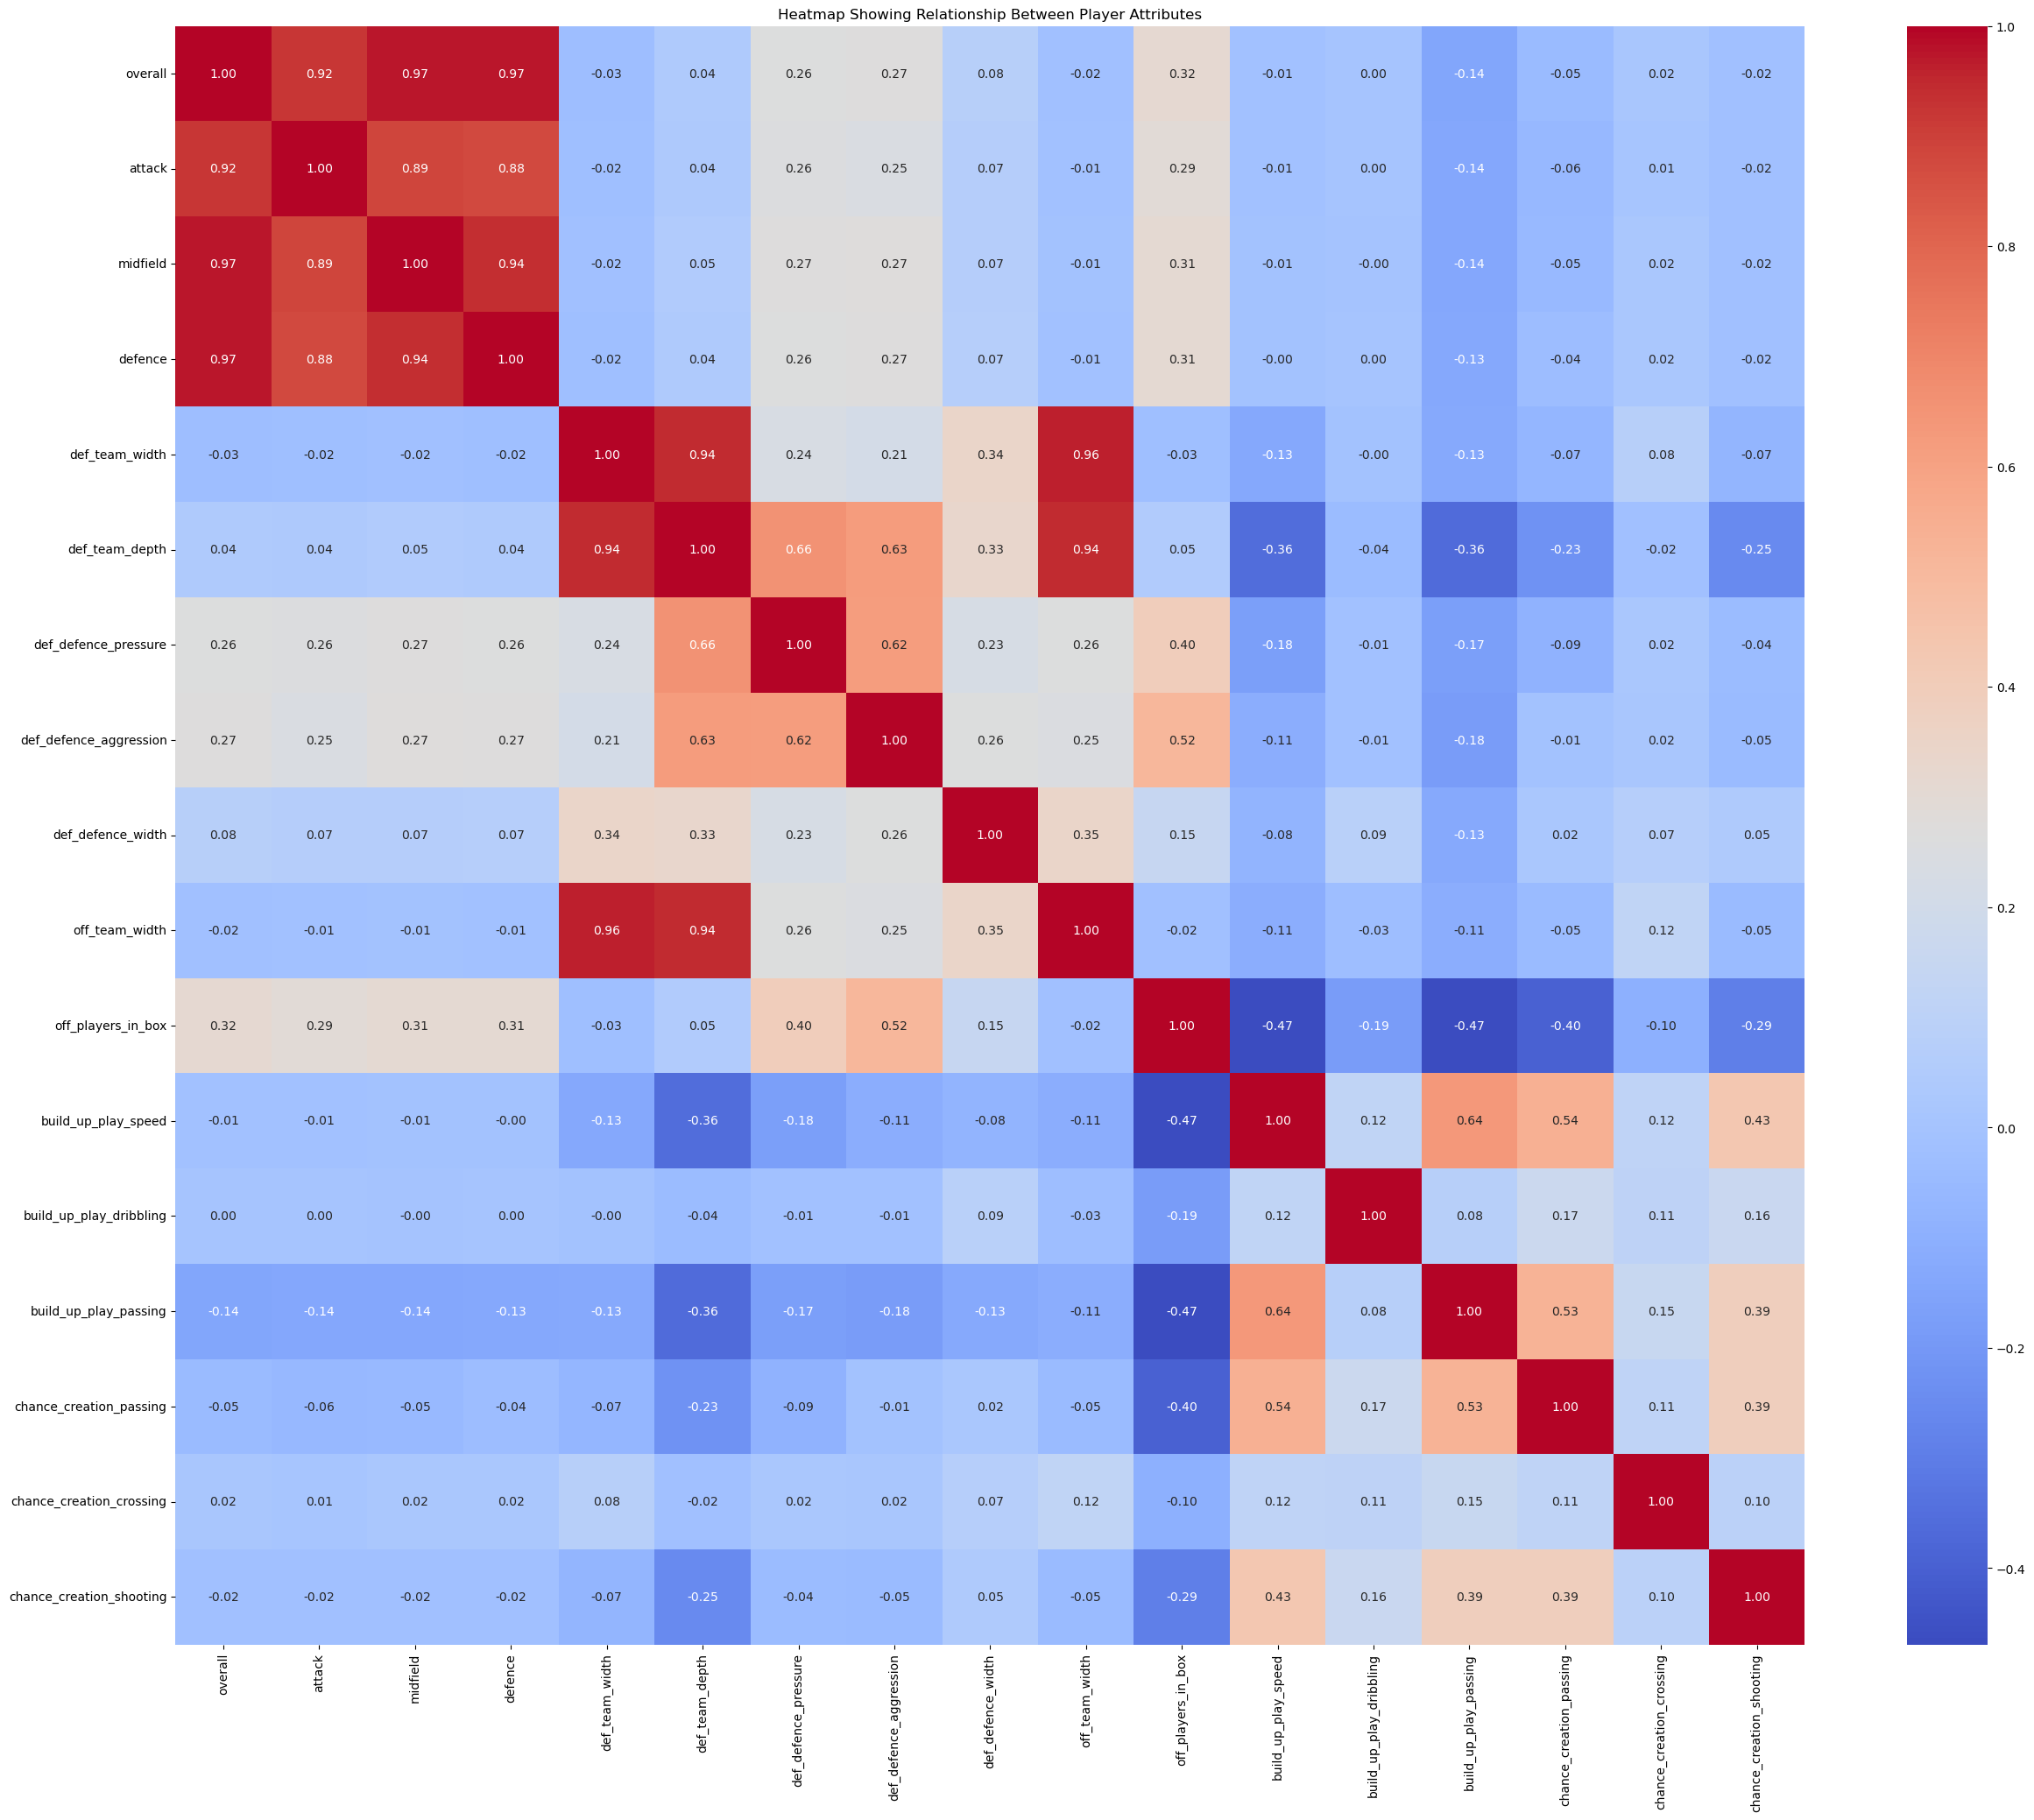

In [17]:
teams_variables_to_plot = ['overall', 'attack', 'midfield', 'defence', 
       'def_team_width', 'def_team_depth', 'def_defence_pressure',
       'def_defence_aggression', 'def_defence_width', 'off_team_width','off_players_in_box', 
       'build_up_play_speed', 'build_up_play_dribbling',
       'build_up_play_passing', 'chance_creation_passing',
       'chance_creation_crossing', 'chance_creation_shooting']

players_num = teams_data[teams_variables_to_plot]
#let's see how these attributes relate with each other with heatmap
plt.figure(figsize=(30,24))
sns.heatmap(players_num.corr(), cmap='coolwarm', annot=True, fmt='.2f').\
set_title('Heatmap Showing Relationship Between Player Attributes');



**Attributes vs. Overall Score**

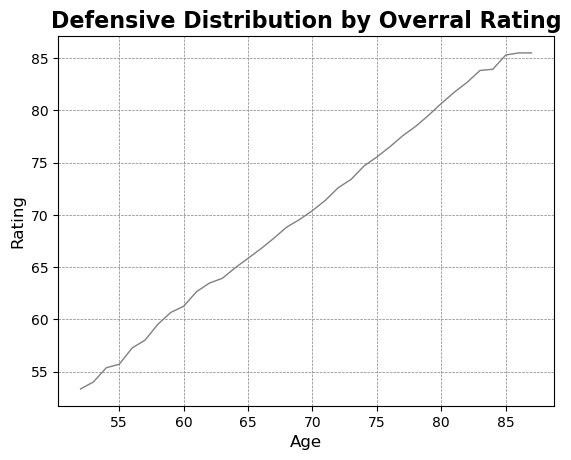

In [18]:
# Group by 'Age' and calculate the mean of 'Overall' rating
age_rating_mean = teams_data.groupby('defence')['overall'].mean().reset_index()

# Plot the data
plt.plot(age_rating_mean['defence'], age_rating_mean['overall'], color='grey', linewidth=1)
plt.title("Defensive Distribution by Overral Rating", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()


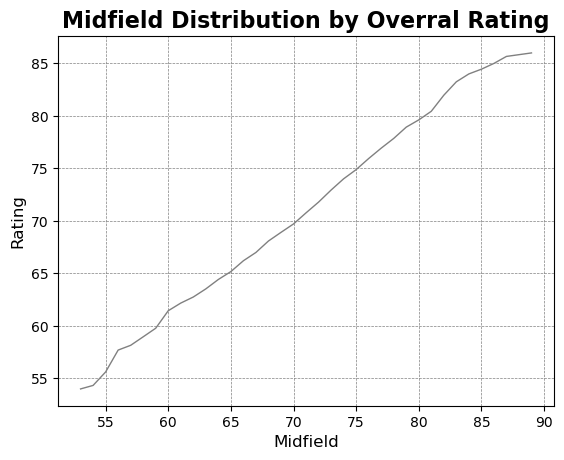

In [19]:
# Group by 'Age' and calculate the mean of 'Overall' rating
age_rating_mean = teams_data.groupby('midfield')['overall'].mean().reset_index()

# Plot the data
plt.plot(age_rating_mean['midfield'], age_rating_mean['overall'], color='grey', linewidth=1)
plt.title("Midfield Distribution by Overral Rating", fontsize=16, fontweight='bold')
plt.xlabel("Midfield", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()


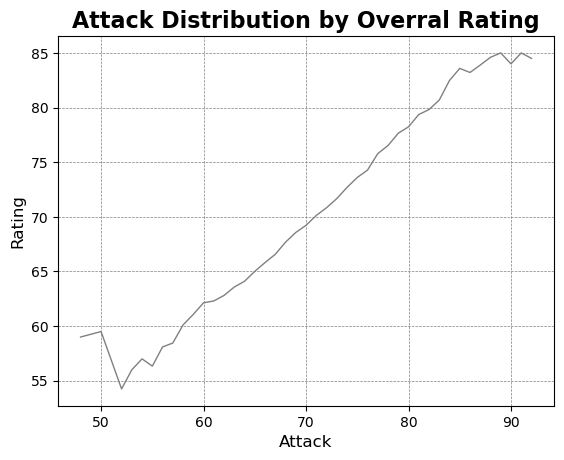

In [20]:
# Group by 'Age' and calculate the mean of 'Overall' rating
age_rating_mean = teams_data.groupby('attack')['overall'].mean().reset_index()

# Plot the data
plt.plot(age_rating_mean['attack'], age_rating_mean['overall'], color='grey', linewidth=1)
plt.title("Attack Distribution by Overral Rating", fontsize=16, fontweight='bold')
plt.xlabel("Attack", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()




**Top Teams in Key Attributes**

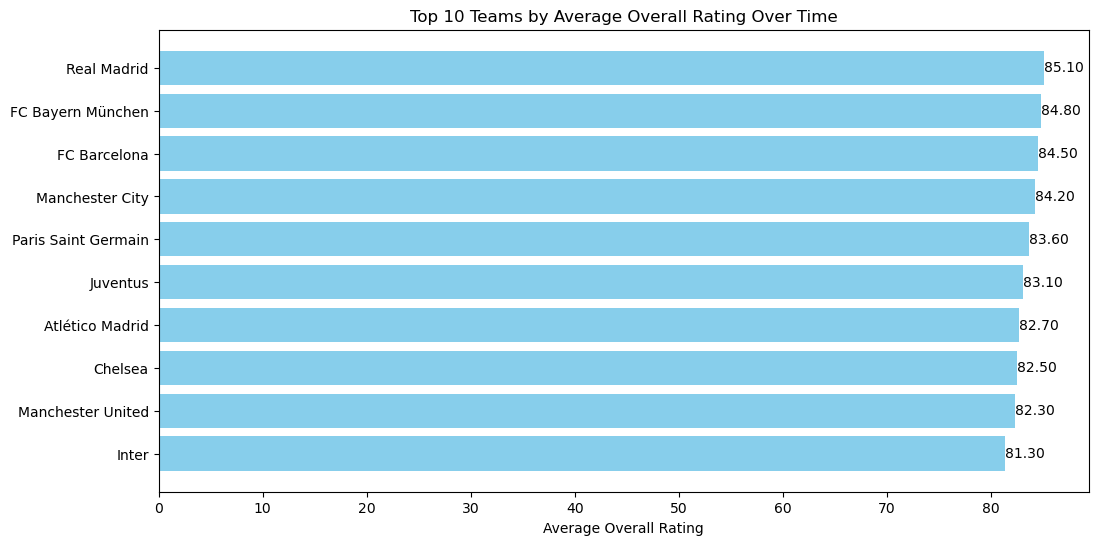

In [21]:
# Group by player_name and calculate the average overall rating
top_10_teams = teams_data.groupby('team_name')[['overall']].mean().sort_values(by='overall', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_teams.index, top_10_teams['overall'], color='skyblue')
plt.xlabel('Average Overall Rating')
plt.title('Top 10 Teams by Average Overall Rating Over Time')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center', color='black')

plt.show()


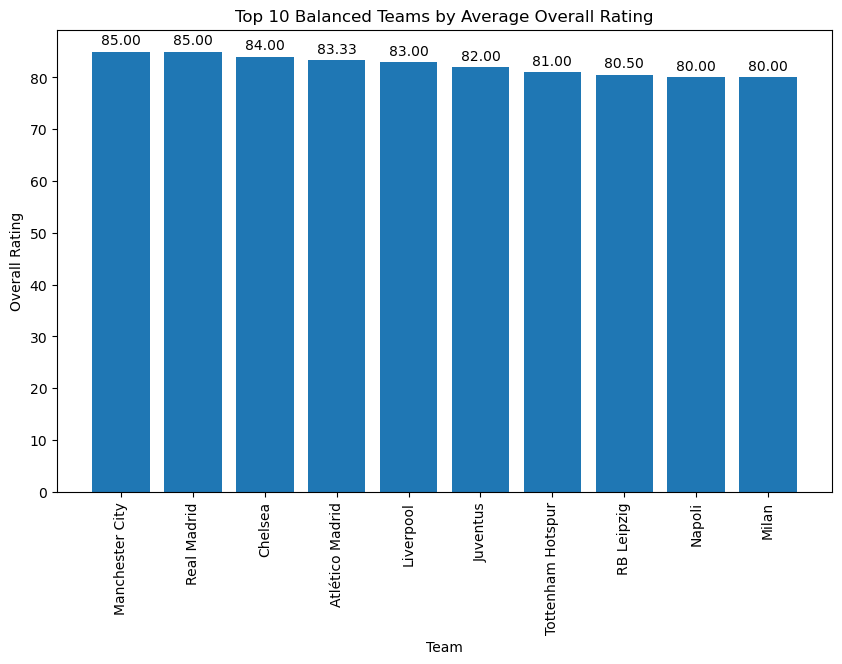

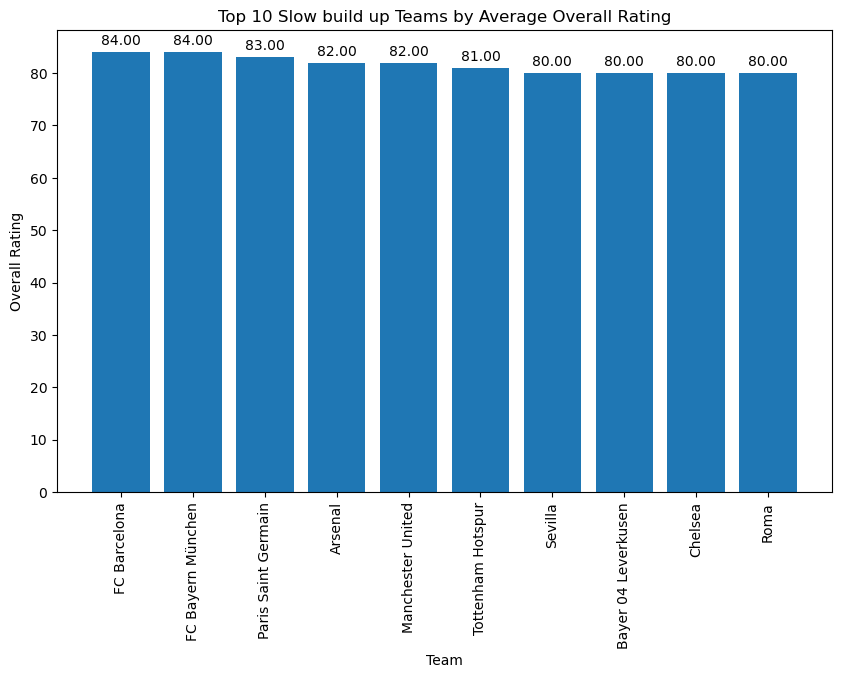

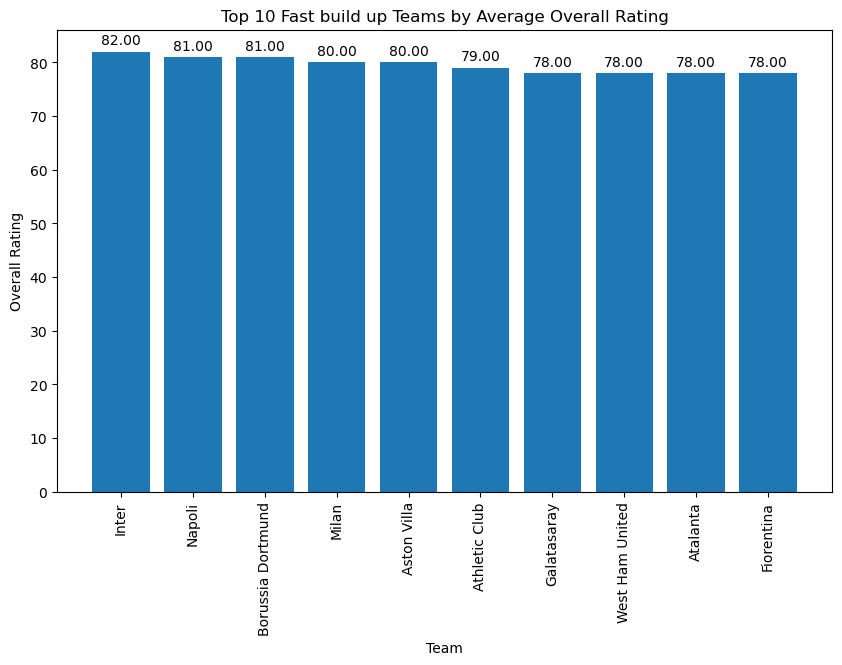

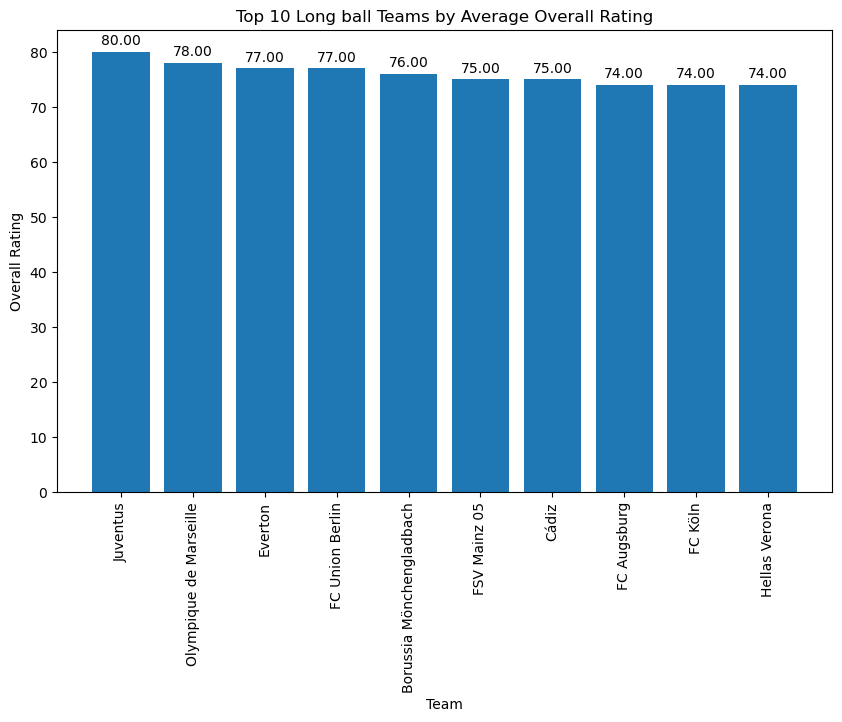

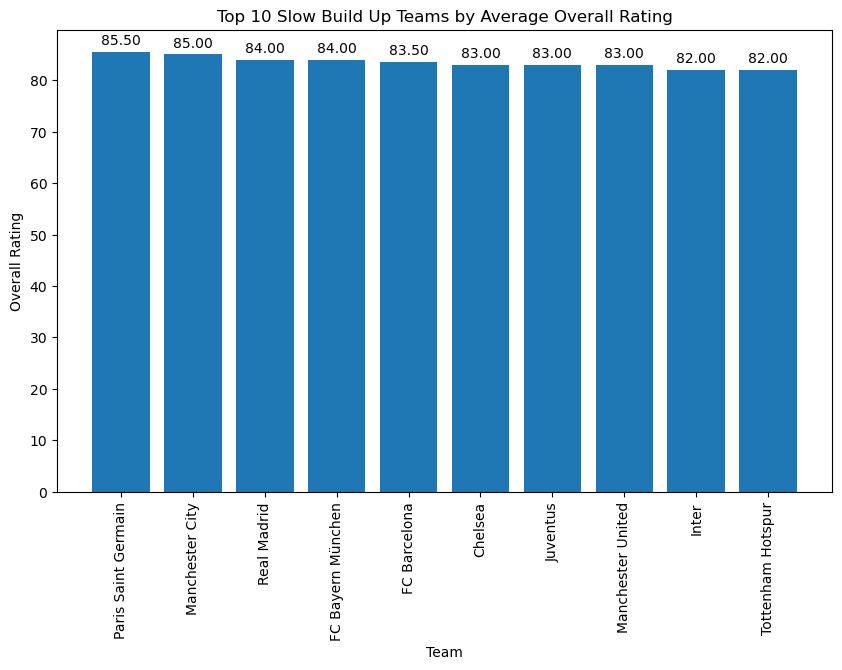

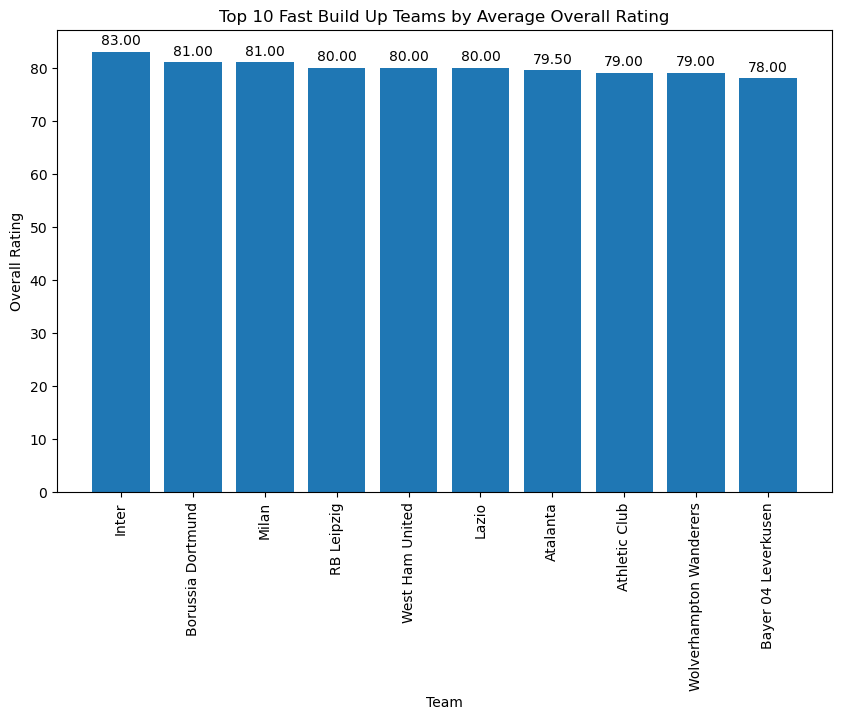

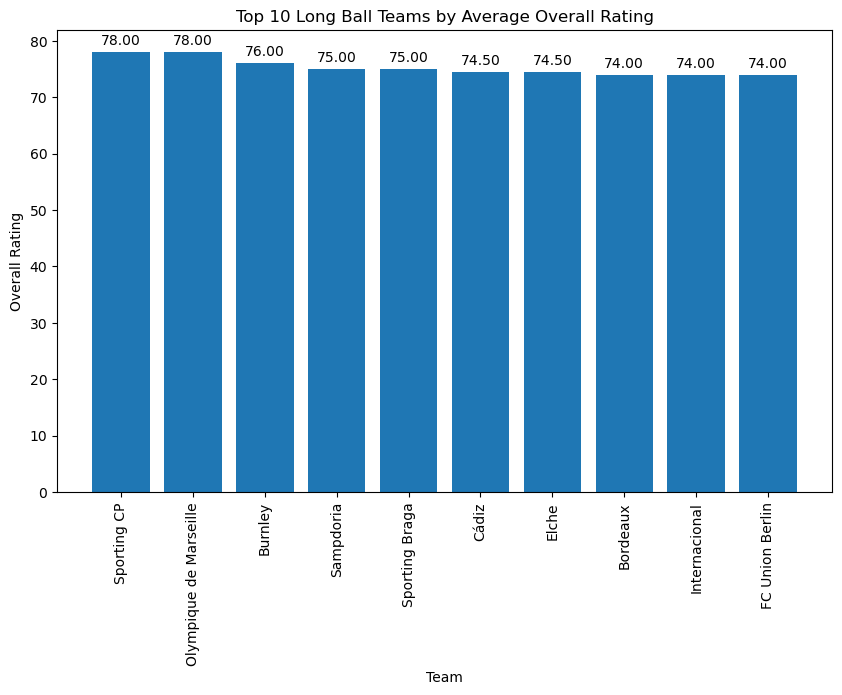

In [22]:
# Initialize an empty dictionary to store the top players for each category
top_teams_by_category = {}

# Get unique categories
# categories = teams_data['off_build_up_play'].unique()

categories = ['Balanced', 'Slow build up', 'Fast build up', 'Long ball',
       'Slow Build Up', 'Fast Build Up', 'Long Ball']

# Loop through each category
for category in categories:
    # Filter data for the current category
    category_df = teams_data[teams_data['off_build_up_play'] == category]

    # Calculate the mean overall rating for each player in the category
    avg_ratings = category_df.groupby('team_name')[['overall']].mean()

    # Sort the players by average rating in descending order
    top_teams = avg_ratings.sort_values(by='overall', ascending=False).head(10)

    # Store the top players for the category
    top_teams_by_category[category] = top_teams

# Create bar charts for the top 10 players in each category
for category, top_teams in top_teams_by_category.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_teams.index, top_teams['overall'])
    plt.xlabel('Team')
    plt.ylabel('Overall Rating')
    plt.title(f'Top 10 {category} Teams by Average Overall Rating')
    plt.xticks(rotation=90)

    # Add data labels to the bars
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    plt.show()


**League Analysis**

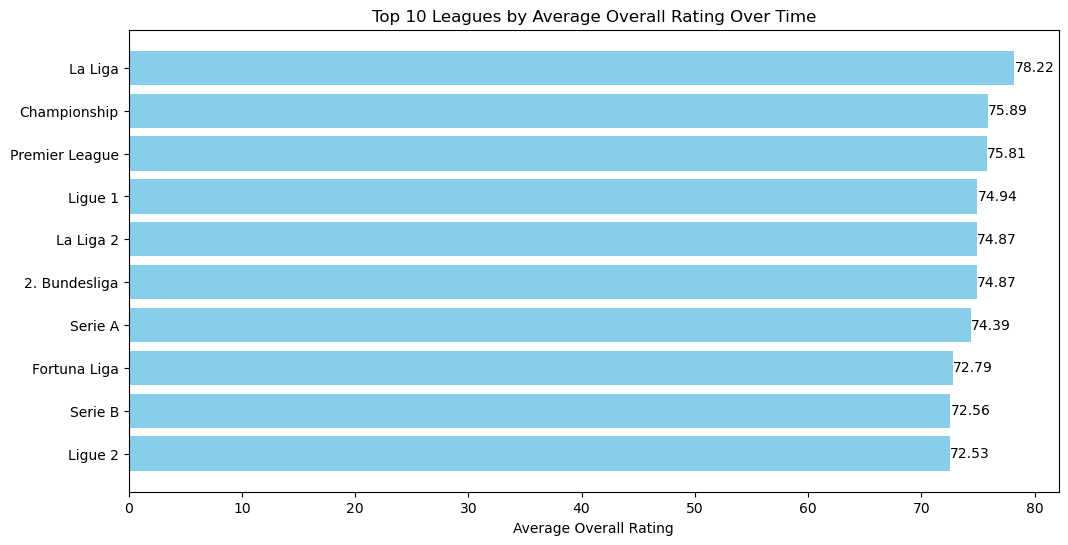

In [23]:
# Group by player_name and calculate the average overall rating
top_10_leagues = teams_data.groupby('league_name')[['overall']].mean().sort_values(by='overall', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_leagues.index, top_10_leagues['overall'], color='skyblue')
plt.xlabel('Average Overall Rating')
plt.title('Top 10 Leagues by Average Overall Rating Over Time')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center', color='black')

plt.show()


In [35]:
!pip show streamlit


Name: streamlit
Version: 1.28.1
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\osadi\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, importlib-metadata, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, python-dateutil, requests, rich, tenacity, toml, tornado, typing-extensions, tzlocal, validators, watchdog
Required-by: 
